In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

In [2]:
original_image = cv2.imread("media/images/face.png", 0)
print(original_image.shape)

(300, 300)


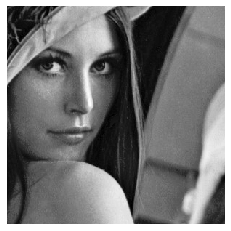

In [3]:
plt.figure(figsize=(4,4))
plt.imshow(original_image, cmap="gray")
plt.axis(False)
plt.show()

In [4]:
from illumination import GammaFilter

In [5]:
gf = GammaFilter()
gamma_values = [0.1, 0.25, 0.5, 0.75, 1, 2, 4, 8]

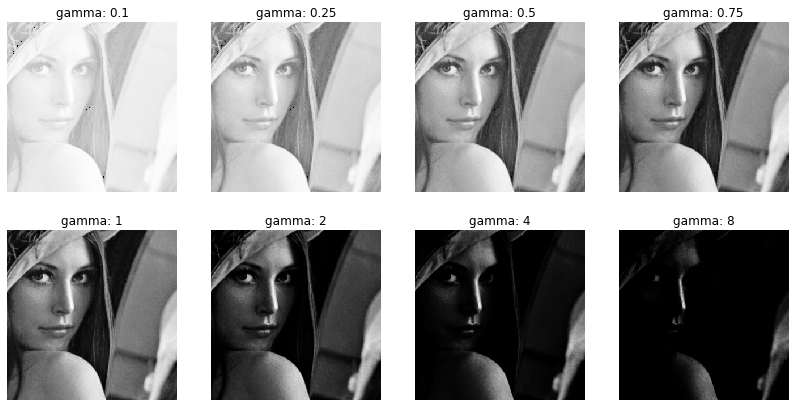

In [6]:
config_dict = {"gamma":0}

plt.figure(figsize=(14,7))
for i, item in enumerate(gamma_values):
    config_dict["gamma"] = item
    gf.config(config_dict)
    plt.subplot(2, 4, i + 1)
    plt.title("gamma: {}".format(item))
    plt.imshow(gf.filter(original_image), cmap="gray")
    plt.axis(False)
plt.show()

In [7]:
# from noise import SPNoise, GausseNoise, PoissonNoise, SpeckNoise

In [8]:
from blur import AvgBlur, GaussianBlur, MedianBlur

In [9]:
filters = [AvgBlur(), GaussianBlur(), MedianBlur()]
names = ["avg: ", "gauss: ", "median: "]
kernels = [3, 5, 7, 11]

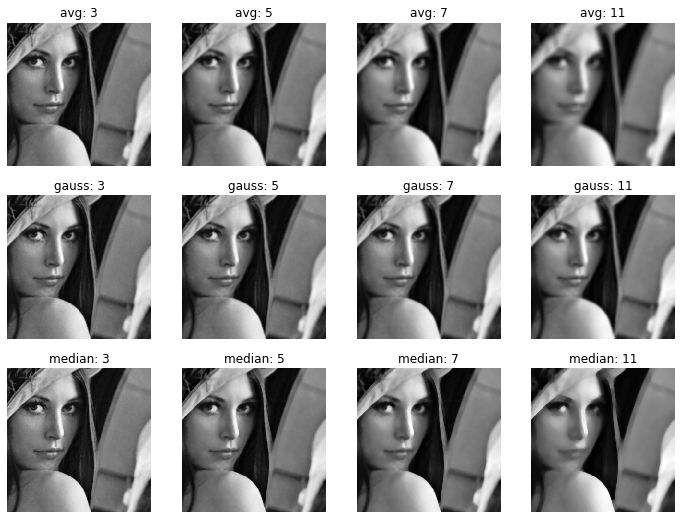

In [10]:
plt.figure(figsize=(3 * len(kernels), 3 * len(filters)))
plt.axis(False)
for i, f in enumerate(filters):
    for j,k in enumerate(kernels):
        c_config = {"kernel": k}
        f.config(c_config)
        output_image = f.filter(original_image)

        plt.subplot(len(filters), len(kernels), j + 1 + i*len(kernels))
        plt.title(names[i] + str(k))
        plt.imshow(output_image, cmap="gray")
        plt.axis(False)
plt.show()

In [11]:
from noise import SPNoise, GaussianNoise, PoissonNoise

In [12]:
sp_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
spnoiser = SPNoise()

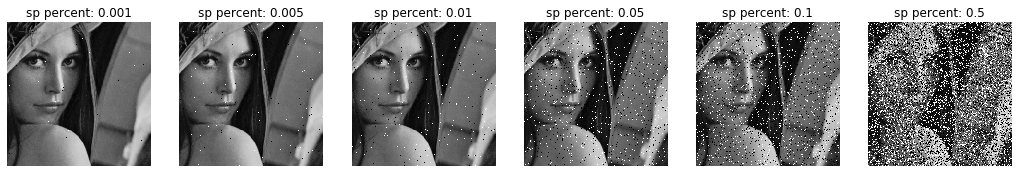

In [13]:
plt.figure(figsize=(3 * len(sp_values), 4))
for i, item in enumerate(sp_values):
    spnoiser.config({"percent": item})
    output_image = spnoiser.addNoise(original_image)
    plt.subplot(1, len(sp_values), i + 1)
    plt.title("sp percent: {}".format(item))
    plt.imshow(output_image, cmap="gray")
    plt.axis(False)
plt.show()

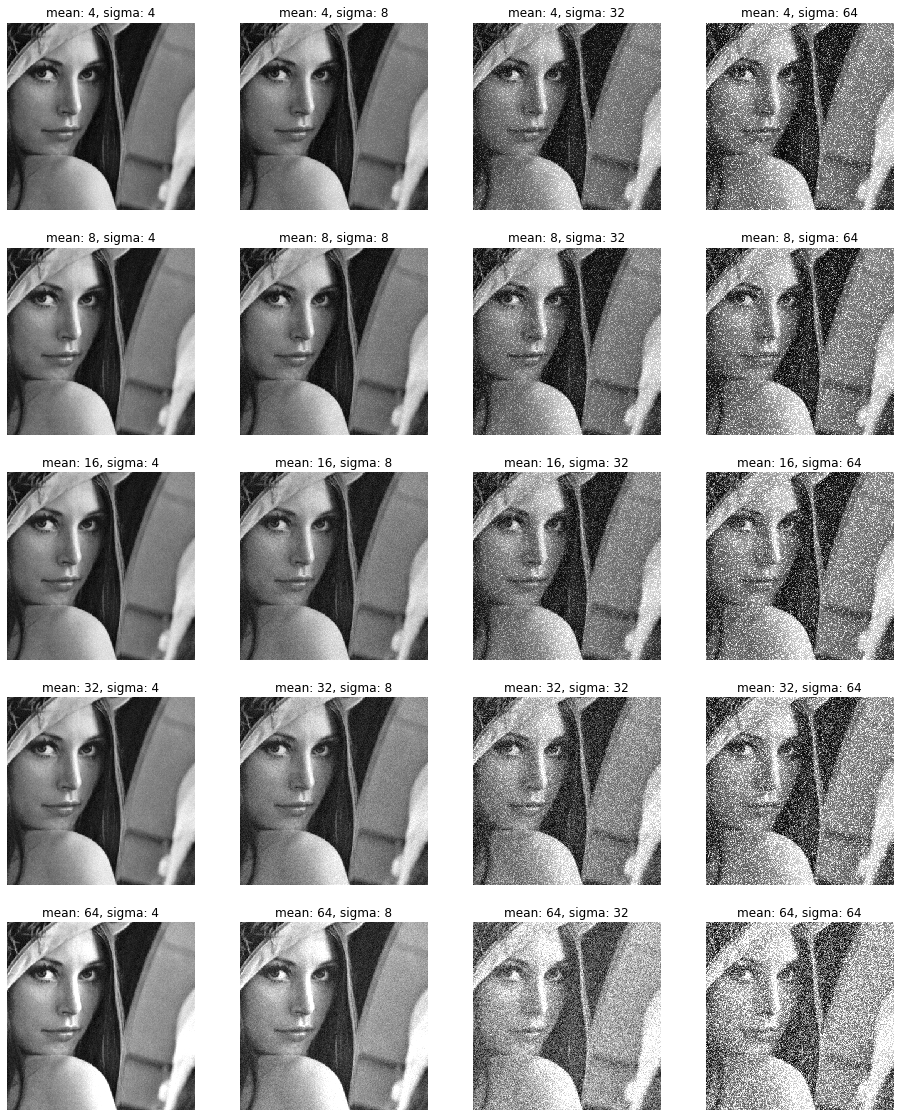

In [14]:
gauss_noiser = GaussianNoise()

mean_values = [4, 8, 16, 32, 64]
sigma_values = [4, 8, 32, 64]

plt.figure(figsize=(4 * len(sigma_values), 4 * len(mean_values)))

for i, u in enumerate(mean_values):
    for j,s in enumerate(sigma_values):
        gauss_noiser.config({"mean": u, "sigma": s})
        output_image = gauss_noiser.addNoise(original_image)
        # print(output_image.shape)

        plt.subplot(len(mean_values), len(sigma_values), j + 1 + i*len(sigma_values))
        plt.title("mean: {}, sigma: {}".format(u,s))
        plt.imshow(output_image, cmap="gray")
        plt.axis(False)
plt.show()
        

In [15]:
pn = PoissonNoise()
output_image = pn.addNoise(original_image)

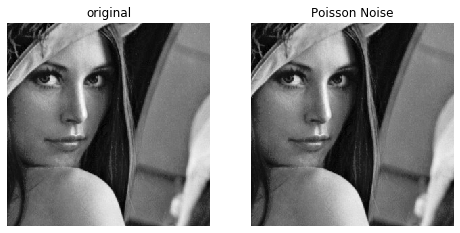

In [16]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("original")
plt.imshow(original_image, cmap="gray")
plt.axis(False)

plt.subplot(1,2,2)
plt.title("Poisson Noise")
plt.imshow(output_image, cmap="gray")
plt.axis(False)

plt.show()

In [17]:
from noise import SepeckleNoise
sn = SepeckleNoise()
output_image = sn.addNoise(original_image)

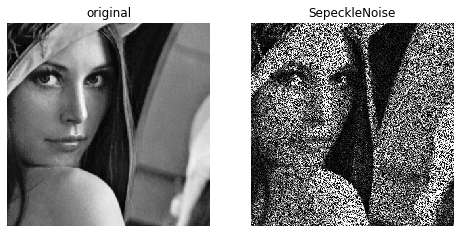

In [18]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("original")
plt.imshow(original_image, cmap="gray")
plt.axis(False)

plt.subplot(1,2,2)
plt.title("SepeckleNoise")
plt.imshow(output_image, cmap="gray")
plt.axis(False)

plt.show()

In [19]:
from contrast import ABContrast

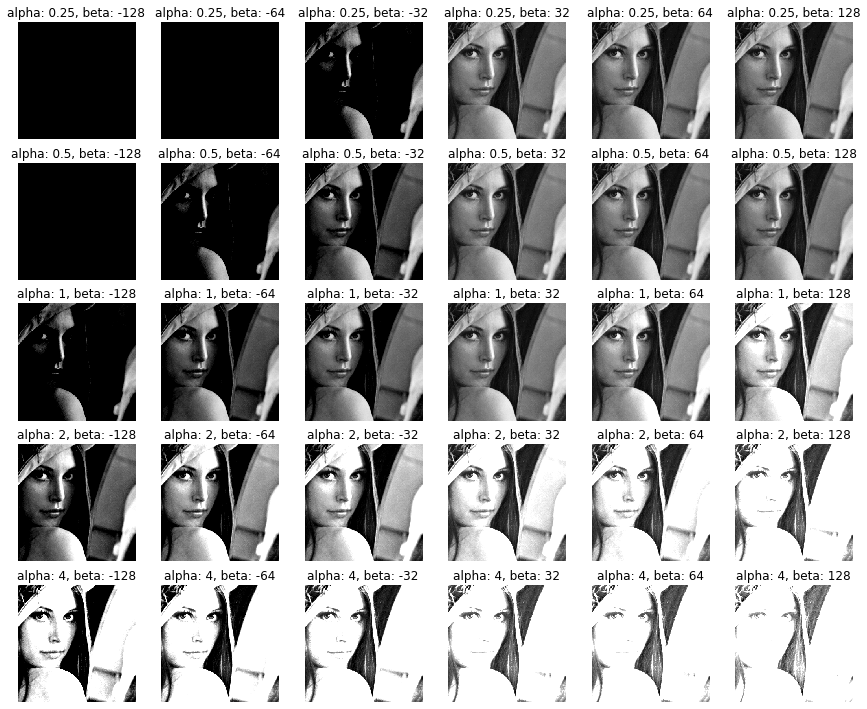

In [20]:
abconstrast = ABContrast()

beta_values = [-128, -64, -32, 32, 64, 128]
alpha_values = [0.25, 0.5, 1, 2, 4]

plt.figure(figsize=(2.5 * len(beta_values), 2.5 * len(alpha_values)))

for i, u in enumerate(alpha_values):
    for j,s in enumerate(beta_values):
        abconstrast.config({"alpha": u, "beta": s})
        output_image = abconstrast.filter(original_image)

        plt.subplot(len(alpha_values), len(beta_values), j + 1 + i*len(beta_values))
        plt.title("alpha: {}, beta: {}".format(u,s))
        plt.imshow(output_image, cmap="gray")
        plt.axis(False)
plt.show()

In [21]:
from contrast import IncreaseContrast, ReduceContrast, EqulizerHistogramFilter

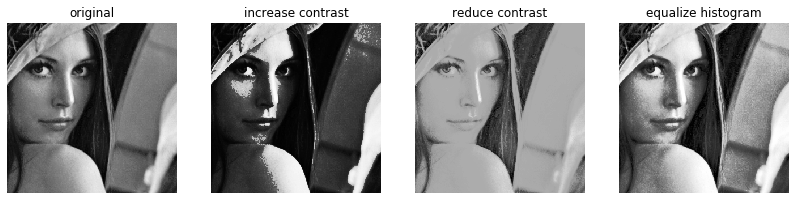

In [22]:
ic = IncreaseContrast()
rc = ReduceContrast()
eqc = EqulizerHistogramFilter()

ic_image = ic.filter(original_image)
rc_image = rc.filter(original_image)
equ_image = eqc.filter(original_image)

plt.figure(figsize=(14,4))

plt.subplot(1,4,1)
plt.title("original")
plt.imshow(original_image, cmap="gray")
plt.axis(False)

plt.subplot(1,4,2)
plt.title("increase contrast")
plt.imshow(ic_image, cmap="gray")
plt.axis(False)

plt.subplot(1,4,3)
plt.title("reduce contrast")
plt.imshow(rc_image, cmap="gray")
plt.axis(False)

plt.subplot(1,4,4)
plt.title("equalize histogram")
plt.imshow(equ_image, cmap="gray")
plt.axis(False)

plt.show()